In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:

# Read CSV files into Pandas DataFrames
extrastate = pd.read_csv("extrastate.csv")
interstate = pd.read_csv("interstate.csv")
intrastate = pd.read_csv("intrastate.csv")
fatalities_isr_pse_conflict = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")


In [4]:

# Filtering rows based on conditions and selecting specific columns
filtered_data = extrastate[ (extrastate['side1_name'] == 'Israel') | (extrastate['side2_name'] == 'Israel')][['start_year1', 'war_name', 'side1_name', 'side2_name', 'state_fatalities', 'nonstate_fatalities']]

# Display the resulting DataFrame
print(filtered_data)


     start_year1          war_name side1_name    side2_name  state_fatalities  \
180         2000  Al Aqsa Intifada     Israel  Palestinians               900   

     nonstate_fatalities  
180                 3400  


In [5]:

# Filtering rows based on conditions and selecting specific columns
filtered_data_palestinians = extrastate[(extrastate['side1_name'] == 'Palestinians') | (extrastate['side2_name'] == 'Palestinians')][['start_year1', 'war_name', 'side1_name', 'side2_name', 'state_fatalities', 'nonstate_fatalities']]

# Display the resulting DataFrame
print(filtered_data_palestinians)


     start_year1             war_name      side1_name    side2_name  \
153         1936  British-Palestinian  United Kingdom  Palestinians   
180         2000     Al Aqsa Intifada          Israel  Palestinians   

     state_fatalities  nonstate_fatalities  
153               126                 2450  
180               900                 3400  


In [6]:

# Filtering rows based on conditions and selecting specific columns
filtered_interstate = interstate[interstate['state_name'] == 'Israel'][['start_year1', 'war_name', 'state_name', 'side', 'combat_fatalities']]

# Display the resulting DataFrame
print(filtered_interstate)


     start_year1          war_name state_name  side  combat_fatalities
197         1948      Arab-Israeli     Israel     1               3000
222         1956         Sinai War     Israel     1                189
244         1967       Six Day War     Israel     1               1000
253         1969  War of Attrition     Israel     1                368
264         1973    Yom Kippur War     Israel     1               2838
288         1982  War over Lebanon     Israel     1                455


In [7]:

# Filtering rows based on conditions and selecting specific columns
filtered_intrastate = intrastate[(intrastate['side1_name'] == 'Israel') | (intrastate['side2_name'] == 'Israel')][['start_year1', 'war_name', 'side1_name', 'side2_name', 'side1_fatalities', 'side2_fatalities']]

# Display the resulting DataFrame
print(filtered_intrastate)


     start_year1        war_name side1_name side2_name  side1_fatalities  \
290         1978  Third Lebanese     Israel         -8                -9   

     side2_fatalities  
290                -8  


In [8]:

# Filtering rows based on conditions and selecting specific columns
filtered_intrastate_palestinians = intrastate[(intrastate['side1_name'] == 'Palestinians') | (intrastate['side2_name'] == 'Palestinians')][['start_year1', 'war_name', 'side1_name', 'side2_name', 'side1_fatalities', 'side2_fatalities']]

# Display the resulting DataFrame
print(filtered_intrastate_palestinians)


     start_year1                                     war_name    side1_name  \
23          1834  Egypt- Palestinian Anti-Conscription Revolt  Palestinians   
254         1970                              Black September        Jordan   

       side2_name  side1_fatalities  side2_fatalities  
23          Egypt              1500               500  
254  Palestinians               750              2690  


In [9]:

# Creating df1 by selecting specific columns and renaming columns
df1 = extrastate[['side1_name', 'side2_name', 'start_year1', 'start_month1', 'start_day1', 'state_fatalities', 'nonstate_fatalities', 'outcome']]
df1.columns = ['side1_name', 'side2_name', 'start_year1', 'start_month1', 'start_day1', 'side1_fatalities', 'side2_fatalities', 'outcome']

# Creating df2 by selecting specific columns
df2 = intrastate[['side1_name', 'side2_name', 'start_year1', 'start_month1', 'start_day1', 'side1_fatalities', 'side2_fatalities', 'outcome']]

# Concatenating (combining) df1 and df2 into df3
df3 = pd.concat([df1, df2])

# Displaying the resulting DataFrame (df3)
print(df3)

         side1_name                  side2_name  start_year1  start_month1  \
0       Netherlands                          -8         1816             8   
1    United Kingdom                     Algeria         1816             8   
2    Ottoman Empire              Saudi Wahhabis         1816             9   
3             Spain  San Martin revolutionaries         1817             1   
4             Spain                 New Granada         1817             4   
..              ...                         ...          ...           ...   
437         Somalia                        SCIC         2006             3   
438        Ethiopia                          -8         2006            10   
439              -8                     Eritrea         2006            10   
440       Sri Lanka                        LTTE         2006            10   
441           Yemen               Zaidi Muslims         2007             1   

     start_day1  side1_fatalities  side2_fatalities  outcome  


In [10]:
# Convert 'outcome' column to categorical data
df3['outcome'] = df3['outcome'].astype('category')

# Splitting the DataFrame into training and testing sets
train, test = train_test_split(df3, test_size=0.25, random_state=42)

# Displaying the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (480, 8)
Testing set shape: (160, 8)


In [11]:
X = df3[['start_year1', 'start_month1', 'start_day1', 'side1_fatalities', 'side2_fatalities']]
y = df3['outcome']

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train your RandomForestClassifier
trained_model = RandomForestClassifier()
trained_model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
# Make predictions on the test set
predictions = trained_model.predict(X_test)

# Display the predictions
print("Predicted outcomes:", predictions)

Predicted outcomes: [1 1 1 2 4 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 2 1 1 7 1 1 1 6 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 3 6 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 3 1 4 4 6 6 1 1 1 1 4 1 1 1
 1 2 1 2 7 2 1 1 3 1 2 5 1 4 3 1 4 1 1 1 1 1 5 1 2 3 3 3 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 5 1 1 1 1 1 1]


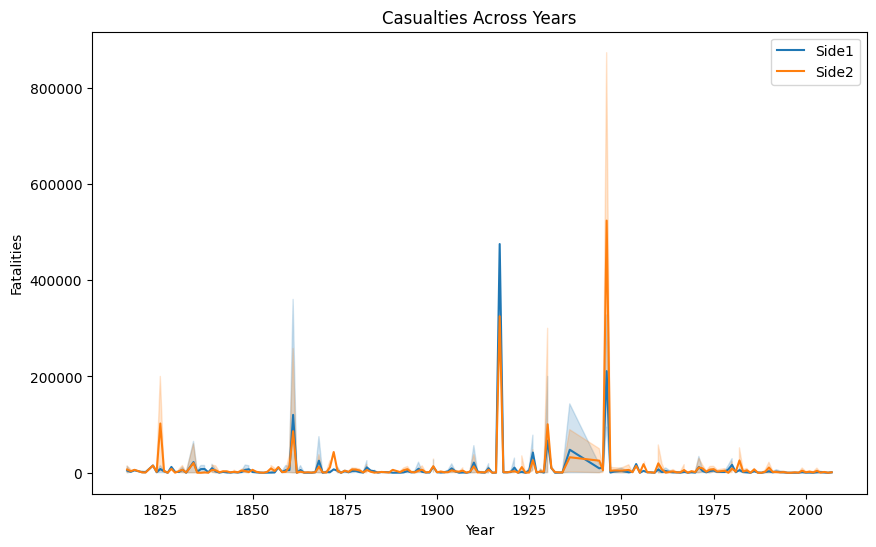

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3, x='start_year1', y='side1_fatalities', label='Side1')
sns.lineplot(data=df3, x='start_year1', y='side2_fatalities', label='Side2')
plt.title('Casualties Across Years')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [16]:
feature_importance = best_model.feature_importances_

In [17]:
from sklearn.metrics import accuracy_score, classification_report

predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6375
Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.93      0.77        86
           2       0.62      0.31      0.42        32
           3       0.70      0.44      0.54        16
           4       0.67      0.31      0.42        13
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7

    accuracy                           0.64       160
   macro avg       0.52      0.36      0.40       160
weighted avg       0.61      0.64      0.59       160



C:\Users\YAshraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YAshraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YAshraf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [20]:
predictions = best_model.predict(X_test)

# Display the predicted outcomes
print("Predicted outcomes:", predictions)

Predicted outcomes: [3 1 1 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 3 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 3 1 4 4 1 6 1 1 1 1 4 1 1 1
 1 1 1 2 6 2 1 1 2 1 1 6 1 4 3 1 4 1 1 1 1 1 5 1 6 3 3 3 1 2 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1]


In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[80  3  2  0  0  1  0]
 [21 10  0  1  0  0  0]
 [ 8  1  7  0  0  0  0]
 [ 6  2  0  4  0  1  0]
 [ 1  0  0  0  1  0  0]
 [ 4  0  0  0  0  0  0]
 [ 3  0  1  1  0  2  0]]


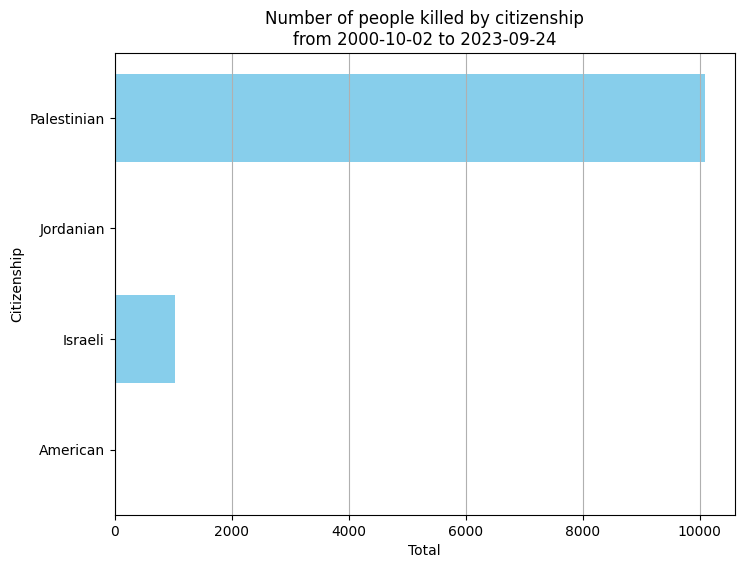

In [24]:
# Group by 'citizenship' and calculate the count
grouped_data = fatalities_isr_pse_conflict.groupby('citizenship').size().reset_index(name='total')

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.barh(grouped_data['citizenship'], grouped_data['total'], color='skyblue')
plt.xlabel('Total')
plt.ylabel('Citizenship')
plt.title('Number of people killed by citizenship\nfrom 2000-10-02 to 2023-09-24')
plt.grid(axis='x')

# Displaying the plot
plt.show()

In [27]:
# Group by 'citizenship' and calculate the percentage
grouped_data = fatalities_isr_pse_conflict.groupby('citizenship').size()
percentage = grouped_data * 100 / len(fatalities_isr_pse_conflict)
result_df = pd.DataFrame({'citizenship': percentage.index, 'perc': percentage.values.round(2)})

# Displaying the resulting DataFrame
print(result_df)

   citizenship   perc
0     American   0.01
1      Israeli   9.25
2    Jordanian   0.02
3  Palestinian  90.72


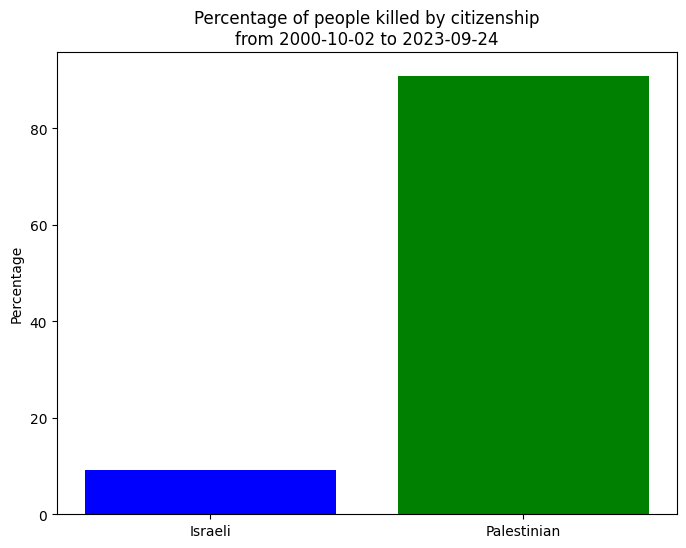

In [38]:
# Filter 'citizenship' for Israeli and Palestinian
filtered_df = result_df[result_df['citizenship'].isin(['Israeli', 'Palestinian'])]

# Plotting the polar bar plot
plt.figure(figsize=(8, 6))
plt.bar(filtered_df['citizenship'], filtered_df['perc'], color=['blue', 'green'])
plt.ylabel('Percentage')
plt.title('Percentage of people killed by citizenship\nfrom 2000-10-02 to 2023-09-24')
plt.ylim(0, max(filtered_df['perc']) + 5)  # Adjust ylim to prevent cutting off text
plt.show()